In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/DS-case-study/Air_Quality_Analysis
!git config --global user.email taeyoon.kim.ds@gmail.com
!git config --global user.name TaeyoonKim-DS
!git add .
!git commit -m "Update air quality"
!git push

/content/drive/MyDrive/DS-case-study/Air_Quality_Analysis
[main a54cf34] Update air quality
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite ds04.AirQualityAnalysis.ipynb (86%)
fatal: could not read Username for 'https://github.com': No such device or address


# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
2차 산업혁명 이후 전 지구상의 대기질은 지속적으로 나빠지고 있다.
공기질에 영향을 미치는 다양한 Feature 분석해보자.
Regression 모델링을 이용하여 다양한 변수와 상대습도의 상관관계를 학습하는 모델을 만들어 보도록 하자.
```



> **데이터 살펴보기**

* 상대습도 정보와 대기 내 포함된 정보
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|Date|날짜 (DD/MM/YYYY)
|Time|시각 (HH.MM.SS)|
|CO(GT)|CO in mg/m^3|
|PT08.S1|tin oxide|
|NMHC(GT)|Non Metanic HydroCarbons|
|C6H6(GT)|Benzene in microg/m^3|
|PT08.S2(NMHC)|titania|
|NOx (GT)|ppb|
|PT08.S3(NOx)|tungsten oxide|
|NO2(GT)|NO2 microg/m^3|
|PT08.S4(NO2)|tungsten oxide|
|PT08.S5(O3)|indium oxide|
|T|Temperature|
|RH|Relative Humidity|
|AH|Absolute Humidity|

# **Data Spec Check**
---
> **Data 가공 명세서**

<img src = "https://drive.google.com/uc?id=15iIfM_4v8EHwZr-ppk_eiuRQnw-UdDnU">

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 공기질에 영향을 미치는 데이터들이 어떤 특성에 영향을 받는지 분석해보자.
```  

> **기대효과**

```
▶ 대기를 구성하고 있는 성분을 통해 상대 습도에 대한 예측이 가능하다면 다양한 분야에 접목가능 할 것이다.
```

> **해결방안**

```
▶ 다양한 Regression 방법 적용을 통한 영향 정도 분석
▶ Session 1 🥉
 - 결측 데이터 처리하기
 - 문자열 데이터 -> 날짜형 데이터로 처리하기
▶ Session 2 🥈
 - 데이터 시각화
▶ Session 3 🥇
 - Linear regression, Logistic regeression, Decision tree
 - Random forest, Support Vector Machine
```

> **성과측정**  

```
▶ 각 모델 기법의 에러량
```

> **현업적용**  

```
▶ 제조업에서는 습도 관리가 필수, 습도의 변화를 분석할 수 있는 역량 강화
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Missing value, to_datetime
▶ Session 2 → Scatter plot, line plot, heat map
▶ Session 3 → 다양한 Regression 기법들
```

# Data Info Check

In [ ]:
data_path = "/content/drive/MyDrive/DS-case-study/[04]Data/"

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


#loading dataset
df = pd.read_csv(data_path + 'AirQualityUCI.csv')#, header=None)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
col= list(df.columns)
print(col)

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


In [ ]:
# Make column names without parenthesis and connect with underbar
col = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

In [ ]:
# Defining col numbers
r = list(np.arange(len(col)))
print(r)
df = pd.read_csv(data_path + 'AirQualityUCI.csv', header=None, skiprows=1, names=col, na_filter=True,
                   na_values=-100, usecols=r)
df.head(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10-03-2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11-03-2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11-03-2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11-03-2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11-03-2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [ ]:
df.tail(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Duplicated Data Check
print("Duplicated rows :", len(df[df.duplicated()]))
# duplicate data removal
df = df[~df.duplicated()]

Duplicated rows : 113


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9358 entries, 0 to 9357
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   float64
 4   NMHC_GT       9357 non-null   float64
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   float64
 7   NOX_GT        9357 non-null   float64
 8   PT08_S3_NOX   9357 non-null   float64
 9   NO2_GT        9357 non-null   float64
 10  PT08_S4_NO2   9357 non-null   float64
 11  PT08_S5_O3    9357 non-null   float64
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
df.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


array([[<Axes: title={'center': 'CO_GT'}>,
        <Axes: title={'center': 'PT08_S1_CO'}>,
        <Axes: title={'center': 'NMHC_GT'}>,
        <Axes: title={'center': 'C6H6_GT'}>],
       [<Axes: title={'center': 'PT08_S2_NMHC'}>,
        <Axes: title={'center': 'NOX_GT'}>,
        <Axes: title={'center': 'PT08_S3_NOX'}>,
        <Axes: title={'center': 'NO2_GT'}>],
       [<Axes: title={'center': 'PT08_S4_NO2'}>,
        <Axes: title={'center': 'PT08_S5_O3'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

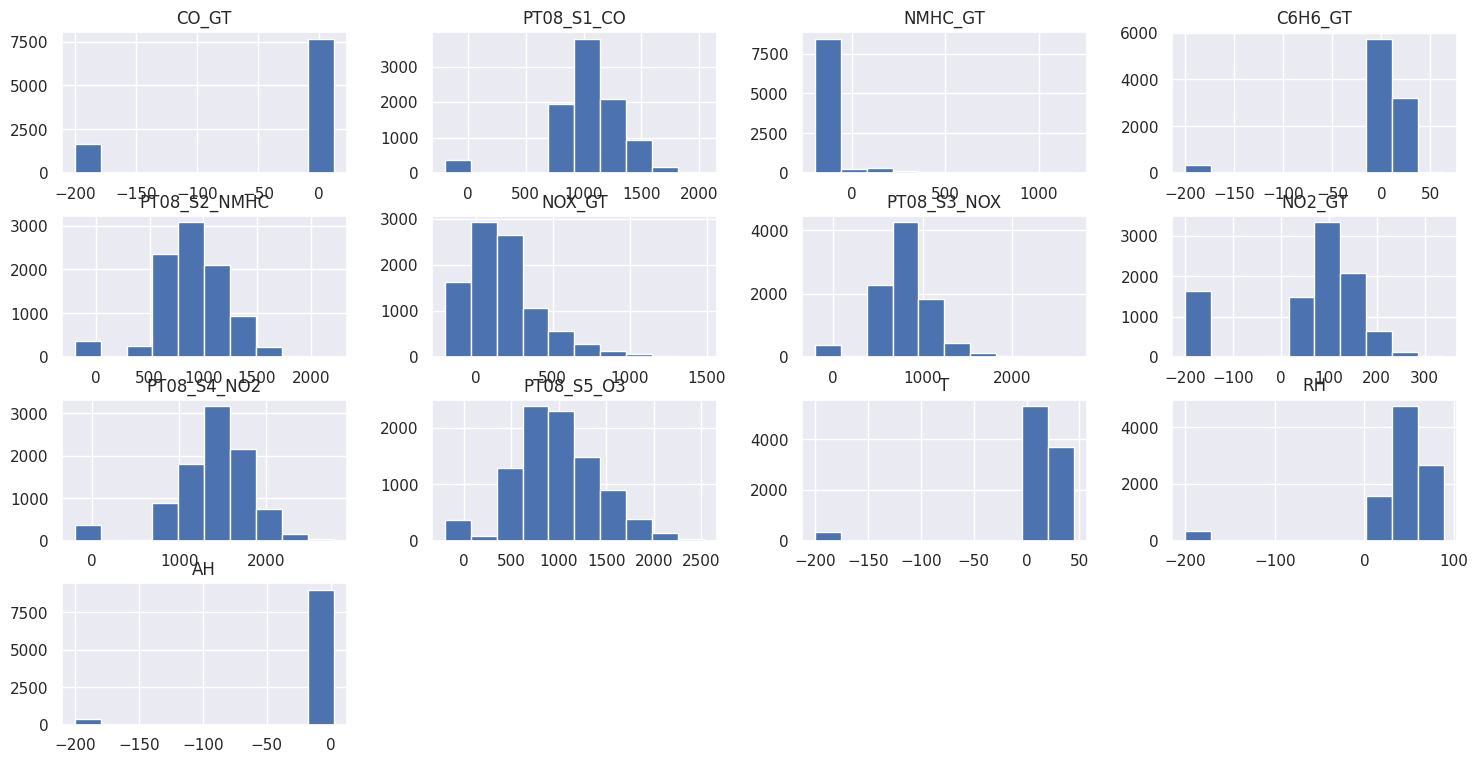

In [ ]:
df.drop(['DATE'], axis=1).hist(figsize=(18,9))

# **🥉Session 1**  
**┗ Data Readiness Check**  
---

## · Data Readiness Check
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) 추가 컬럼 생성

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
col = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
df1 = pd.read_csv(data_path + 'AirQualityUCI.csv', header=None, skiprows=1, names=col, na_filter=True,
                   na_values=-100, usecols=r)
df1

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Target이 NaN인 데이터 탐색
df.isna().sum().sort_values(ascending=False)

DATE            1
TIME            1
CO_GT           1
PT08_S1_CO      1
NMHC_GT         1
C6H6_GT         1
PT08_S2_NMHC    1
NOX_GT          1
PT08_S3_NOX     1
NO2_GT          1
PT08_S4_NO2     1
PT08_S5_O3      1
T               1
RH              1
AH              1
dtype: int64

In [ ]:
#  NaN 데이터 삭제
df.dropna(how='all', inplace=True)
df.tail(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9347,04-04-2005,05:00:00,0.5,888.0,-200.0,1.3,528.0,77.0,1077.0,53.0,987.0,578.0,10.4,59.9,0.7550
9348,04-04-2005,06:00:00,1.1,1031.0,-200.0,4.4,730.0,182.0,760.0,93.0,1129.0,905.0,9.5,63.1,0.7531
9349,04-04-2005,07:00:00,4.0,1384.0,-200.0,17.4,1221.0,594.0,470.0,155.0,1600.0,1457.0,9.7,61.9,0.7446
9350,04-04-2005,08:00:00,5.0,1446.0,-200.0,22.4,1362.0,586.0,415.0,174.0,1777.0,1705.0,13.5,48.9,0.7553
9351,04-04-2005,09:00:00,3.9,1297.0,-200.0,13.6,1102.0,523.0,507.0,187.0,1375.0,1583.0,18.2,36.3,0.7487
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
#Counting Missing Values from each Column
print('Missing values:\n\n', df.shape[0]-df1.count())
clean = (df.shape[0] - df1.count()).sum()
print("\n")
if clean == 0:
    print("No Missing Values")


Missing values:

 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


No Missing Values


# 🥈Session 2
**┗ Feature Engineering**  
---

In [ ]:
# Categorical and numeric columns
# for column_name in list(df.columns):
  # print(column_name, df[column_name].dtype, df[column_name].unique())

num_cols = list(df.select_dtypes(['float64']).columns)
obj_cols = list(df.select_dtypes(['object']).columns)
target_column = "RH"
print(len(df.columns))
print(len(num_cols))
print(len(obj_cols))

num_cols.remove('RH')
print(len(num_cols))

scaler = StandardScaler() # Define StandardScaler
df_obj = df[obj_cols]
df_scaled = scaler.fit_transform(df[num_cols]) # scaling only for numeric columns
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=num_cols)
df = pd.concat([df_scaled, df['RH'], df_obj], axis=1)

15
13
2
12


In [ ]:
df.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,RH,DATE,TIME
0,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,0.194881,48.9,10-03-2004,18:00:00
1,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.194052,47.7,10-03-2004,19:00:00
2,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.194686,54.0,10-03-2004,20:00:00
3,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.195622,60.0,10-03-2004,21:00:00
4,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.195676,59.6,10-03-2004,22:00:00


In [ ]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,RH
count,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9357.000000
mean,1.032744e-16,-9.416191e-17,1.214992e-17,0.000000,6.682458e-17,-2.429985e-17,1.214992e-16,4.859970e-17,2.186986e-16,-1.974363e-17,-1.366866e-17,-9.112443e-18,39.485380
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,51.216145
min,-2.135042e+00,-3.786940e+00,-2.926701e-01,-4.878576,-3.197626e+00,-1.431966e+00,-3.090259e+00,-2.033730e+00,-3.406529e+00,-2.571759e+00,-4.855832e+00,-4.956111e+00,-200.000000
25%,4.482443e-01,-3.880661e-01,-2.926701e-01,0.051581,-5.363344e-01,-4.607914e-01,-4.906887e-01,-4.056349e-02,-4.419653e-01,-6.020218e-01,2.596437e-02,1.932003e-01,34.100000
50%,4.598343e-01,1.215814e-02,-2.926701e-01,0.145834,1.182314e-03,-1.072837e-01,-3.075281e-03,2.981961e-01,1.166997e-01,-7.238134e-02,1.717933e-01,2.005000e-01,48.600000
75%,4.739999e-01,5.215345e-01,-2.926701e-01,0.283588,6.146524e-01,4.482285e-01,5.124905e-01,5.896869e-01,5.790431e-01,6.126495e-01,3.315106e-01,2.086951e-01,61.900000
max,5.937634e-01,3.004744e+00,9.644258e+00,1.494377,3.854359e+00,5.090445e+00,5.863815e+00,2.220460e+00,2.961396e+00,3.387790e+00,8.060332e-01,2.326799e-01,88.700000


In [ ]:
df = df[col]
df

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,48.9,0.194881
1,10-03-2004,19:00:00,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,47.7,0.194052
2,10-03-2004,20:00:00,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,54.0,0.194686
3,10-03-2004,21:00:00,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,60.0,0.195622
4,10-03-2004,22:00:00,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,59.6,0.195676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,0.480439,0.803511,-0.292670,0.281172,0.602967,1.178552,-0.795059,1.038740,-0.037415,1.650044,0.280586,29.3,0.194855
9353,04-04-2005,11:00:00,0.471424,0.345678,-0.292670,0.230420,0.386792,0.716273,-0.593181,0.952081,-0.272867,0.643290,0.336140,23.7,0.193703
9354,04-04-2005,12:00:00,0.471424,0.282006,-0.292670,0.254587,0.491958,0.483191,-0.596287,0.920568,-0.322099,0.255908,0.396323,18.3,0.191874
9355,04-04-2005,13:00:00,0.467561,-0.139442,-0.292670,0.184502,0.193987,0.257878,-0.288811,0.770884,-0.750194,-0.448820,0.428730,13.5,0.188623


In [ ]:
df['DATE'] = pd.to_datetime(df.DATE, format='%d-%m-%Y')
df['MONTH'] = df['DATE'].dt.month
df.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH
0,2004-03-10,18:00:00,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,48.9,0.194881,3
1,2004-03-10,19:00:00,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,47.7,0.194052,3
2,2004-03-10,20:00:00,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,54.0,0.194686,3
3,2004-03-10,21:00:00,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,60.0,0.195622,3
4,2004-03-10,22:00:00,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,59.6,0.195676,3
5,2004-03-10,23:00:00,0.455971,0.448766,1.409986,0.068498,-0.422404,-0.309288,1.683384,0.298196,0.003254,-0.057061,0.032909,59.2,0.195574,3
6,2004-03-11,00:00:00,0.455971,0.412382,1.359908,0.041914,-0.597681,-0.414175,2.071611,0.148512,-0.125174,-0.529798,0.035223,56.8,0.194945,3
7,2004-03-11,01:00:00,0.453395,0.263814,1.359908,0.034664,-0.650265,-0.414175,2.043659,0.140634,-0.125174,-0.536364,0.021335,60.0,0.195199,3
8,2004-03-11,02:00:00,0.452108,0.136470,1.309829,0.010496,-0.834306,-0.480215,2.434992,0.014583,-0.247182,-0.777110,0.021335,59.7,0.195061,3
9,2004-03-11,03:00:00,0.448244,-0.118218,1.274059,-0.004004,-0.974527,-1.431966,2.826325,-2.033730,-0.334941,-1.037553,0.012076,60.2,0.194724,3


In [ ]:
a = [1,2,3,4,5]
for idx, i in enumerate(a):
  a[idx] = i + 1
a

[2, 3, 4, 5, 6]

In [ ]:
%%timeit
for idx, data in enumerate(df.iterrows()):
  i = idx

502 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
df.apply(lambda x: x)

1.84 ms ± 947 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
df['HOUR'] = df['TIME'].apply(lambda x: int(x.split(':')[0])) #13:00:00
df.HOUR.head(10)

0    18
1    19
2    20
3    21
4    22
5    23
6     0
7     1
8     2
9     3
Name: HOUR, dtype: int64

## · EDA

In [ ]:
sns.set(rc={'figure.figsize':(14, 9)})
#plt.figure(figsize=(12,9))

In [ ]:
# sns.heatmap(df.corr(), annot=True, linewidths=.4)
# plt.title('Heatmap of co-relation between variables', fontsize=16)
# plt.show()

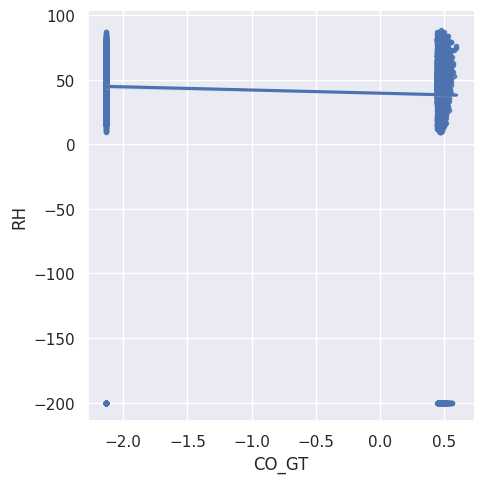

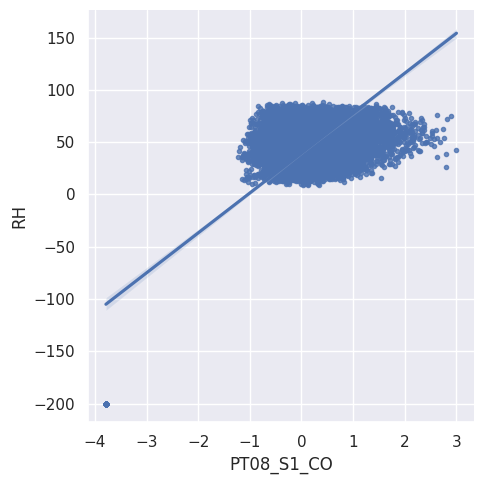

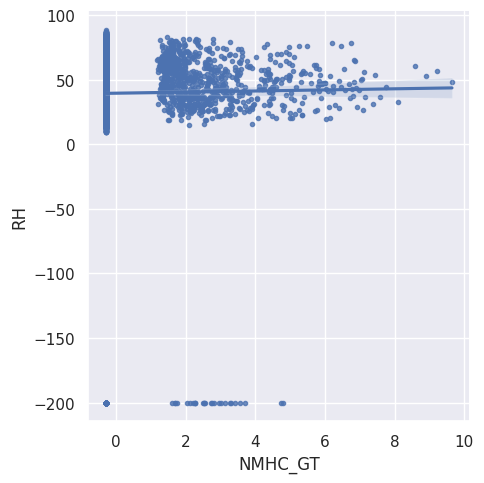

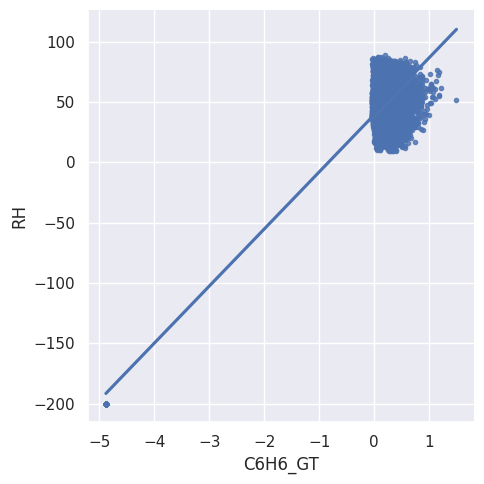

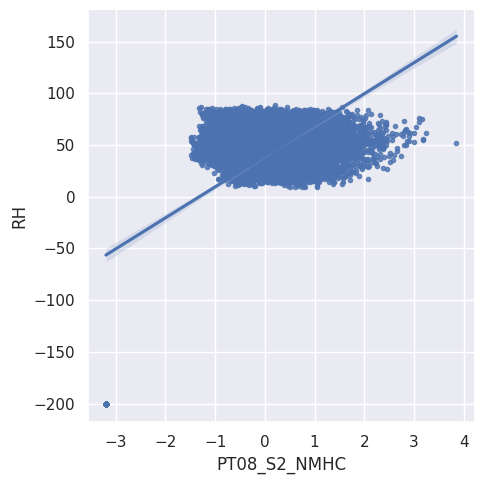

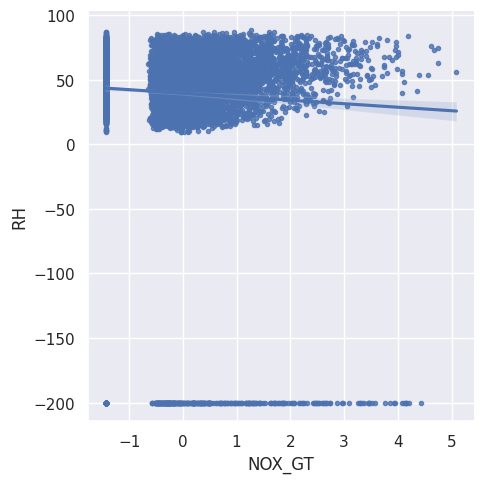

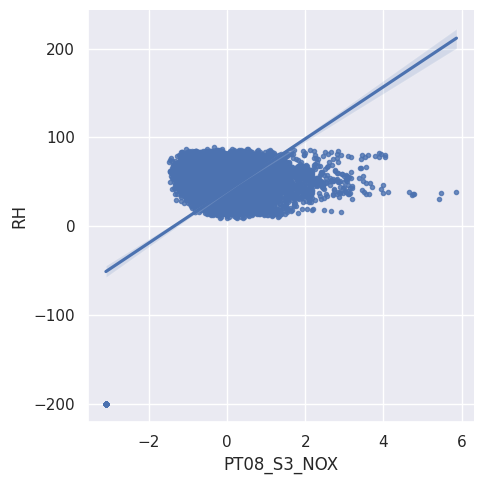

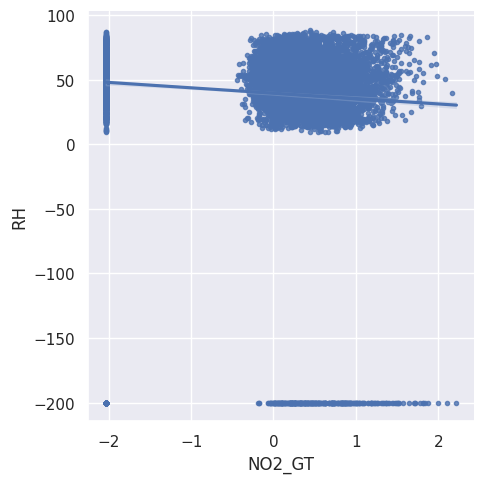

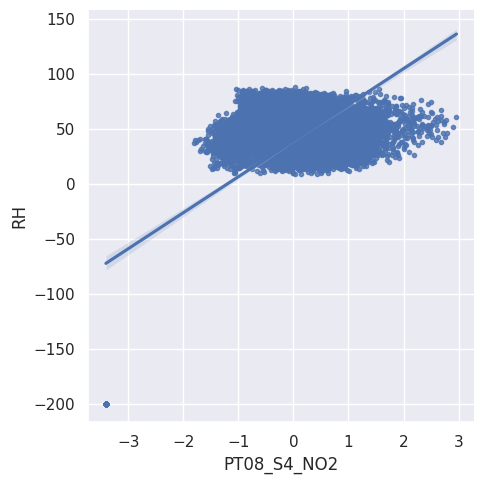

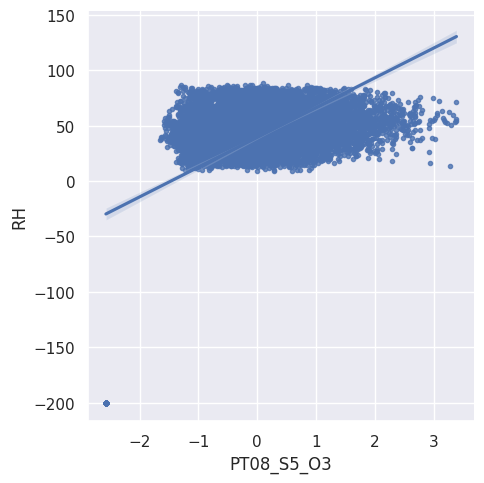

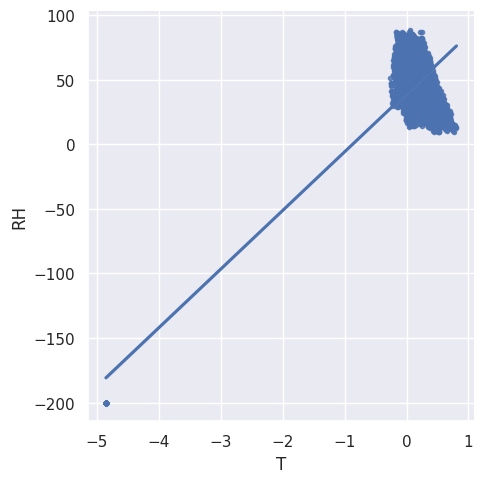

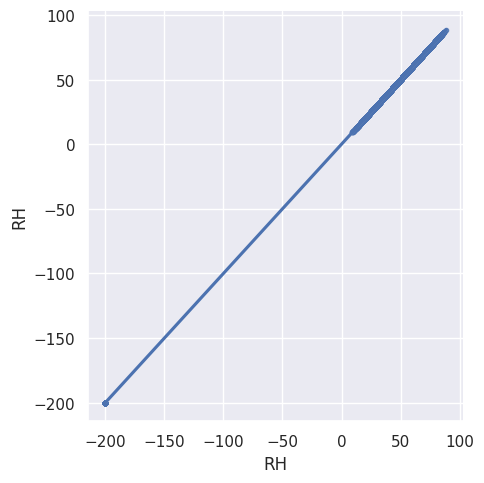

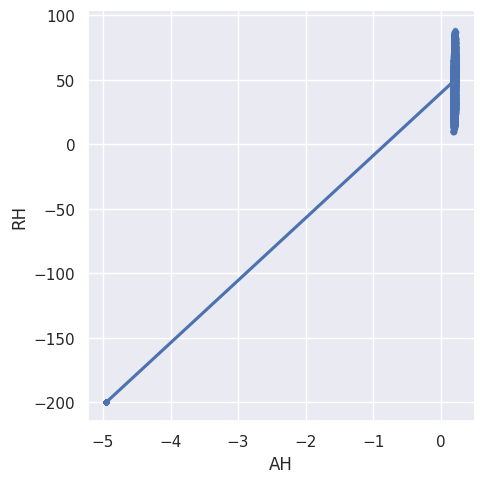

In [ ]:
plt.rcParams["figure.autolayout"] = True
col1 = df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i, y='RH', data=df, markers='.')

# 🥇Session 3
**┗ Modeling**  
---

## · Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[col1].drop('RH',1)
Y = df['RH']
SScaler = StandardScaler()
Xsd = SScaler.fit_transform(X)    #applying stardardisation
X.head()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
Y.head()

NameError: name 'Y' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xsd, Y, test_size=0.4, random_state=3)

In [ ]:
#Data-Size
print('Training Data Size:',X_train.shape)
print('Test Data Size:',X_test.shape)

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
print('Intercept:',model.intercept_)

In [ ]:
prediction = model.predict(X_test)
prediction

In [ ]:
y_test

In [ ]:
print("Co-efficient:")
list(zip(X.columns,model.coef_))

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs=np.sqrt(metrics.mean_squared_error(y_test,prediction))
print(rs)

## · Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [ ]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_y = lab_enc.fit_transform(y_train)
training_y

In [ ]:
model1.fit(X_train,training_y)

In [ ]:
prediction1 = model1.predict(X_test)
prediction1

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs1 = np.sqrt(metrics.mean_squared_error(y_test, prediction1))
print(rs1)

## · Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor( )

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
prediction2 = model2.predict(X_test)
prediction2

In [ ]:
from sklearn import metrics
rs2 = np.sqrt(metrics.mean_squared_error(y_test, prediction2))
print(rs2)

## · Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()

In [ ]:
model3.fit(X_train, y_train)

In [ ]:
prediction3 = model3.predict(X_test)
prediction3

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs3 = np.sqrt(metrics.mean_squared_error(y_test, prediction3))
print(rs3)

## · Support Vector Machine

In [ ]:
from sklearn.svm import SVR
model4 = SVR()

In [ ]:
model4.fit(X_train, y_train)

In [ ]:
prediction4 = model4.predict(X_test)
prediction4

In [ ]:
#Root Mean Square Error
from sklearn import metrics
rs4 = np.sqrt(metrics.mean_squared_error(y_test, prediction4))
print(rs4)

## · Results

In [ ]:
print("Linear Regression=", rs, "\n")
print("Logistic Regression=", rs1, "\n")
print("Decision Tree Regression=", rs2, "\n")
print("Random Forest Regression=", rs3, "\n")
print("Support Vector Machine Regression=", rs4, "\n")

In [ ]:
dict = {"Linear Regression": rs,"Logistic Regression": rs1,"Decision Tree Regression": rs2,"Random Forest Regression": rs3, "Support Vector Machine Regression":rs4   }
res =  [key for key in dict if
        all(dict[temp] >= dict[key]
        for temp in dict)]
min_ = {k: dict[k] for k in dict.keys() & set(res)}
print(min_)

# Lesson and Learned

## 수많은 Regression 방법들, 그 중에서 뭘로 시작할까?

### 1. 모델에 사용되는 데이터들은 연속형 데이터가 대부분인데, 결과는 Binary이거나 Binary 형태로 변형이 가능할 때 -> Logistict Regression
### 2. 데이터들이 연속형과 범주형이 섞여있을때 -> Random Forest
### 3. 데이터들이 대부분 범주형일 때 -> Catboost

## 이번 챕터에서는 결과인 RH가 연속형 변수이므로 Logistic Regression의 결과가 낮게 나왔음. Logistic Regression이 나쁜 모델이 아니라, 현재 데이터와 맞지 않는 알고리즘
### Feature 변수 대부분이 연속형 변수이기 때문에 Linear Regression도 좋은 성능을 보이지만, 일부 변수들이 범주형 성격을 갖고 있는 변수이기 때문에 Random Forest가 가장 좋은 결과가 나옴
#### ※ 현재 시점까지의 데이터를 이용해서 한 모델링 결과는 이렇지만, 지속적으로 생성되는 추가 데이터에 대한 모니터링이 필수